# MotiQ Features Analysis

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import os

In [2]:
# load csv file
dataframe = pd.read_csv("morphologicalDataMotiQ1.csv")

In [3]:
# prepare featuresMatrix
featuresMatrix = dataframe.drop(columns='image_indx')

In [4]:
featuresMatrix.head()

,time [min],x center [um],y center [um],x span [um],y span [um],area [um^2],outline [um],ramification index,spanned area (convex hull) [um^2],spanned outline (convex hull) [um],...,# junctions (all skls),# tips (all skls),# triple points (all skls),# quadruple points (all skls),# junction voxels (all skls),# slab voxels (all skls),tree length (all skls) [um],average branch length (all skls) [um],maximum branch length (all skls) [um],shortest path (all skl) [um]
0,0.0,16.044882,13.662761,31.692,32.109,422.202492,160.128,2.198376,614.871504,125.934,...,2,4,2,0,2,106,52.951809,10.590362,20.867360,35.521630
1,0.0,11.265404,14.772348,21.684,42.534,458.545293,147.618,1.944658,630.173736,126.768,...,0,2,0,0,0,74,36.284085,36.284085,36.284085,36.284085
2,0.0,18.816225,9.058745,36.279,17.514,362.384676,135.108,2.002125,443.243061,105.084,...,1,3,1,0,3,83,42.223266,14.074422,23.339725,33.406995
3,0.0,13.975307,10.122089,25.437,22.935,337.170771,112.590,1.729697,385.859691,95.076,...,1,3,1,0,1,56,27.539360,9.179787,12.051089,21.945633
4,0.0,16.660455,17.026724,30.441,41.700,591.744267,170.970,1.982659,835.884423,141.780,...,1,3,1,0,3,105,52.606355,17.535452,44.826447,50.175901


First use all features/attributes gotten from MotiQ.

In [5]:
# Standardize the features
scaler = StandardScaler()
featuresMatrixScaled = scaler.fit_transform(featuresMatrix)

In [6]:
# Perform PCA
pca = PCA()
principalComponents = pca.fit_transform(featuresMatrixScaled)

In [7]:
# Calculate cumulative explained variance
cumulativeExplainedVariance = pca.explained_variance_ratio_.cumsum()

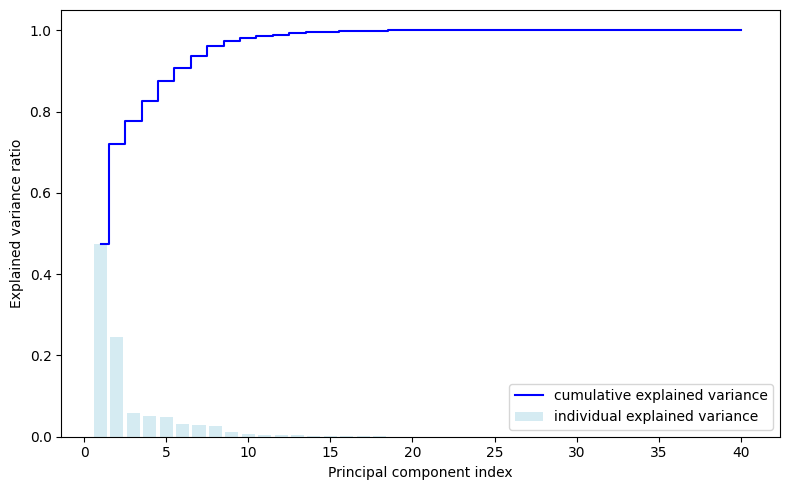

In [8]:
# Create a plot of the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center',
        label='individual explained variance', color='lightblue')
plt.step(range(1, len(cumulativeExplainedVariance) + 1), cumulativeExplainedVariance, where='mid',
         label='cumulative explained variance', color='blue')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

We now try to focus on fewer, more relevant features in the context of glial cells.

In [9]:
parametersOfInterest = [
    "area [um^2]", "ramification index", "# branches (largest skl)",
    "# junctions (largest skl)", "# tips (largest skl)",
    "maximum branch length (largest skl) [um]",
    "tree length (largest skl) [um]"
    ]

In [10]:
featuresMatrix2 = dataframe[parametersOfInterest]

In [11]:
featuresMatrix2.head()

,area [um^2],ramification index,# branches (largest skl),# junctions (largest skl),# tips (largest skl),maximum branch length (largest skl) [um],tree length (largest skl) [um]
0,422.202492,2.198376,5,2,4,20.867360,52.951809
1,458.545293,1.944658,1,0,2,36.284085,36.284085
2,362.384676,2.002125,3,1,3,23.339725,42.223266
3,337.170771,1.729697,3,1,3,12.051089,27.539360
4,591.744267,1.982659,3,1,3,44.826447,52.606355


In [12]:
# Standardize the features
scaler = StandardScaler()
featuresMatrixScaled2 = scaler.fit_transform(featuresMatrix2)

In [13]:
# Perform PCA
pca = PCA()
principalComponents = pca.fit_transform(featuresMatrixScaled2)

In [14]:
# Calculate cumulative explained variance
cumulativeExplainedVariance = pca.explained_variance_ratio_.cumsum()

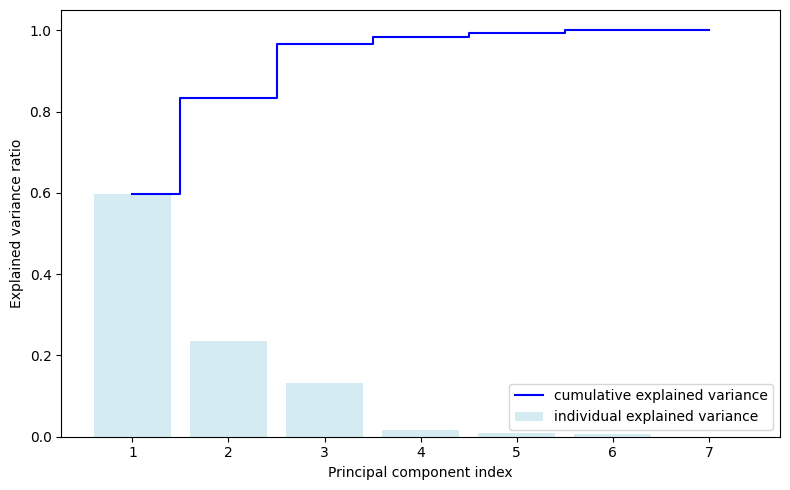

In [15]:
# Create the plot
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center',
        label='individual explained variance', color='lightblue')
plt.step(range(1, len(cumulativeExplainedVariance) + 1), cumulativeExplainedVariance, where='mid',
         label='cumulative explained variance', color='blue')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

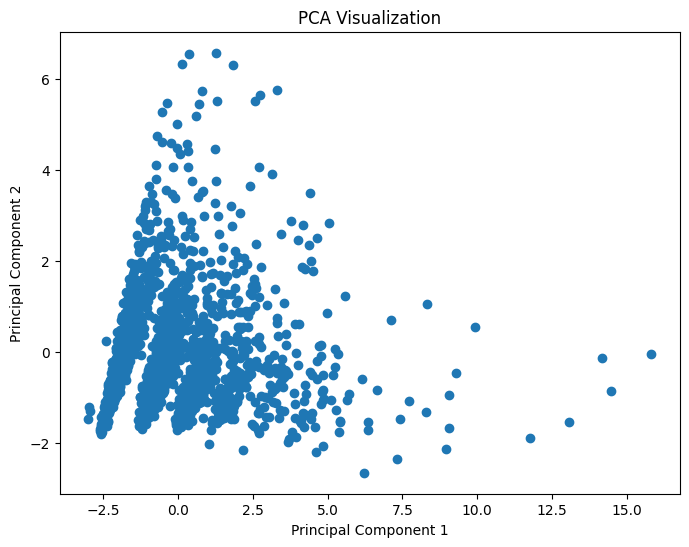

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(principalComponents[:, 0], principalComponents[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()

Load images.

In [17]:
pathFolder = "allGoodCellPatchesWithNoBackgroundInfo/"
numImages = os.listdir(pathFolder)
allImages = [plt.imread(pathFolder + str(i) + '.png') for i in range(len(numImages))]

Sample images along PC1.

In [183]:
first_pc = principalComponents[:, 0]
images_to_sample = np.linspace(0, len(first_pc) - 1, 10, dtype=int)
# Sort the first principal component and get the sorted indices
sorted_indices1 = np.argsort(first_pc)
selected_samples1 = [allImages[i] for i in sorted_indices1[images_to_sample]]
selected_pc_values1 = [first_pc[i] for i in sorted_indices1[images_to_sample]]

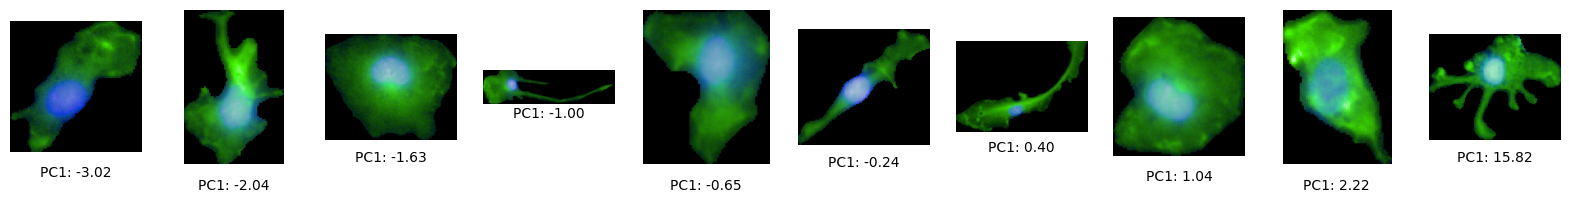

In [184]:
fig, axs = plt.subplots(1, 10, figsize=(20, 2))
for ax, img, pc_value in zip(axs, selected_samples1, selected_pc_values1):
    ax.imshow(img)
    ax.axis('off')
    ax.text(0.5, -0.1, f'PC1: {pc_value:.2f}', ha='center', va='top', transform=ax.transAxes)  # Annotate below the image
plt.show()

Get top 5 PC1 images.

In [185]:
# Get indices of the sorted PC1 values in descending order to get the highest values first
sorted_indices = np.argsort(first_pc)[::-1]  # Reverse to get largest first

# Select the top 5 indices
top_5_indices = sorted_indices[:5]

# Select the images and PC1 values for these top 5 indices
selected_samples_top_5 = [allImages[i] for i in top_5_indices]
selected_pc_values_top_5 = [first_pc[i] for i in top_5_indices]

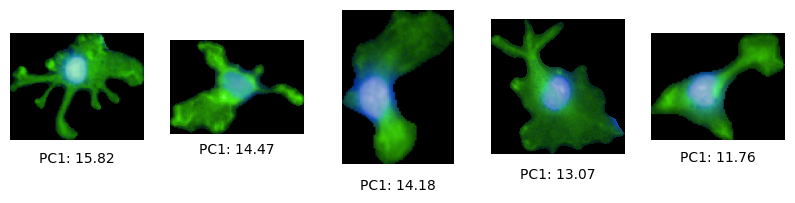

In [186]:
# Plotting
fig, axs = plt.subplots(1, 5, figsize=(10, 2))
for ax, img, pc_value in zip(axs, selected_samples_top_5, selected_pc_values_top_5):
    ax.imshow(img)
    ax.axis('off')
    ax.text(0.5, -0.1, f'PC1: {pc_value:.2f}', ha='center', va='top', transform=ax.transAxes)

plt.show()

Sample images along PC2.

In [187]:
second_pc = principalComponents[:, 1]
images_to_sample = np.linspace(0, len(second_pc) - 1, 10, dtype=int)
# Sort the first principal component and get the sorted indices
sorted_indices2 = np.argsort(second_pc)
selected_samples2 = [allImages[i] for i in sorted_indices2[images_to_sample]]
selected_pc_values2 = [second_pc[i] for i in sorted_indices2[images_to_sample]]

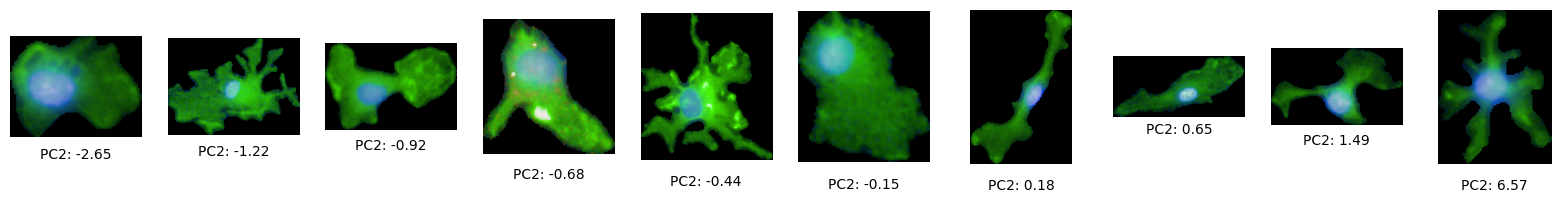

In [188]:
fig, axs = plt.subplots(1, 10, figsize=(20, 2))
for ax, img, pc_value in zip(axs, selected_samples2, selected_pc_values2):
    ax.imshow(img)
    ax.axis('off')
    ax.text(0.5, -0.1, f'PC2: {pc_value:.2f}', ha='center', va='top', transform=ax.transAxes)  # Annotate below the image
plt.show()

Silhouette Analysis.

In [18]:
# first we get the reduced_data
# we will use the first two principal components
# to reduce the data to 2 dimensions
reducedData = principalComponents[:, :2]

For n_clusters = 2 The average silhouette_score is: 0.4866310082807998
For n_clusters = 3 The average silhouette_score is: 0.42975878924043864
For n_clusters = 4 The average silhouette_score is: 0.42974980259744006
For n_clusters = 5 The average silhouette_score is: 0.3532001719734005
For n_clusters = 6 The average silhouette_score is: 0.36073512295051025
For n_clusters = 7 The average silhouette_score is: 0.37797974243478766
For n_clusters = 8 The average silhouette_score is: 0.4068889421248463
For n_clusters = 9 The average silhouette_score is: 0.3992115918519289
For n_clusters = 10 The average silhouette_score is: 0.41344533825408786


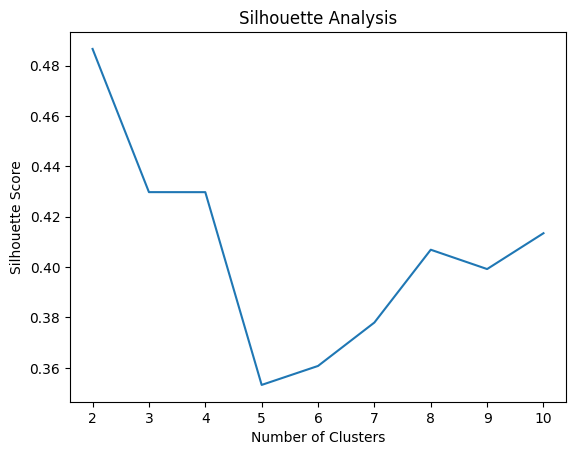

In [193]:
range_n_clusters = range(2, 11)

silhouette_scores = []

for n_clusters in range_n_clusters:
    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(reducedData)
    
    # Calculate the silhouette score
    silhouette_avg = silhouette_score(reducedData, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    print("For n_clusters =", n_clusters, "The average silhouette_score is:", silhouette_avg)

# Plot the silhouette scores
plt.plot(range_n_clusters, silhouette_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.show()

K-means clustering with k = 2.

In [194]:
# Number of clusters are chosen to be 2
k = 2
# Perform KMeans clustering on the PCA-reduced data
kmeans = KMeans(n_clusters=k, n_init='auto')
clusters = kmeans.fit_predict(reducedData)

In [195]:
# Add the cluster labels to original dataframe
dataframe['cluster'] = clusters

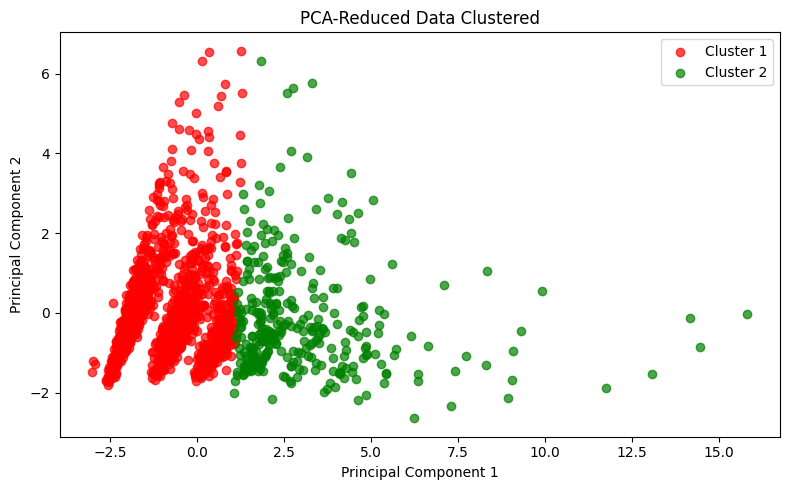

In [196]:
# Visualizing the clusters
plt.figure(figsize=(8, 5))
colors = ['red', 'green']
for i in range(k):
    plt.scatter(reducedData[dataframe['cluster'] == i, 0], 
                reducedData[dataframe['cluster'] == i, 1], 
                label=f'Cluster {i+1}', 
                alpha=0.7, 
                color=colors[i])
plt.title('PCA-Reduced Data Clustered')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.tight_layout()
plt.show()

In [197]:
sampled_img_indices = dataframe.groupby('cluster')['image_indx'].apply(lambda x: x.sample(n=min(len(x), 5))).reset_index(level='cluster')

In [198]:
sampled_img_indices

,cluster,image_indx
433,0,433
324,0,324
1335,0,1335
1539,0,1539
1438,0,1438
683,1,683
1349,1,1349
779,1,779
273,1,273
1530,1,1530


In [199]:
folderPath = "allGoodCellPatchesWithNoBackgroundInfo/"

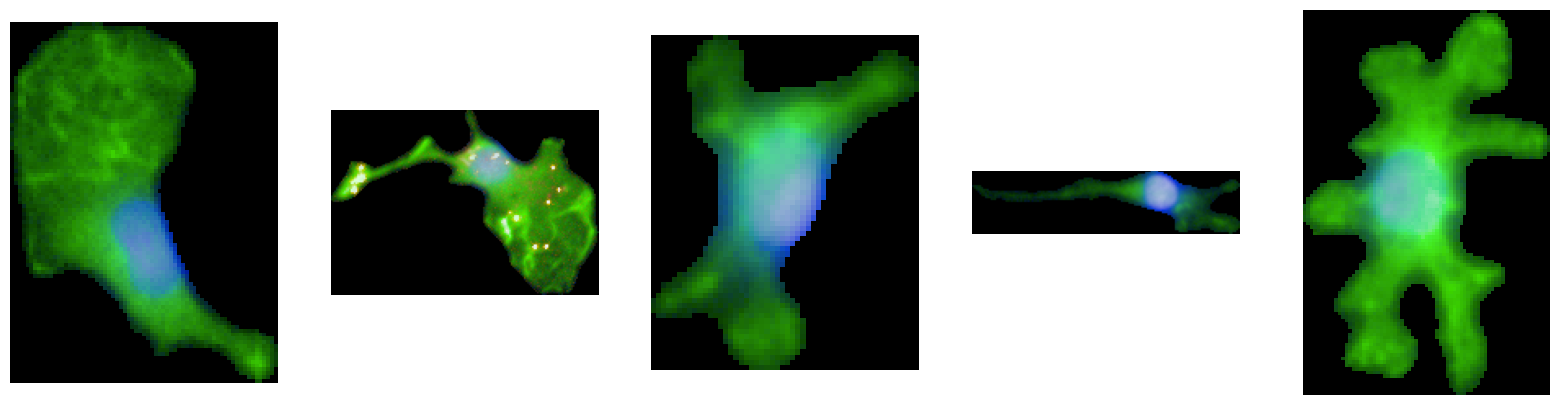

In [200]:
# cluster 0
cluster0 = sampled_img_indices[sampled_img_indices['cluster'] == 0]
cluster0_imgs = cluster0['image_indx'].values
# display the images
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
for i, img in enumerate(cluster0_imgs):
    ax[i].imshow(plt.imread(folderPath + str(img) + '.png'))
    ax[i].axis('off')

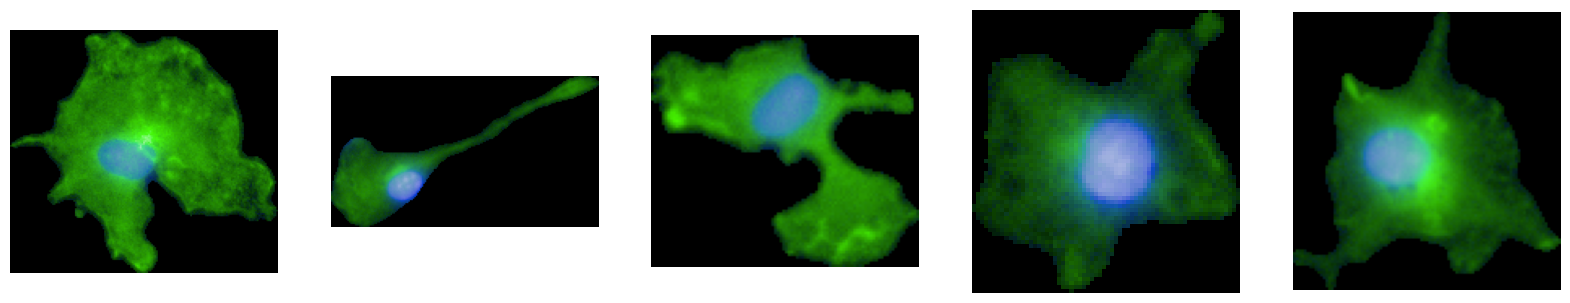

In [201]:
# cluster 1
cluster1 = sampled_img_indices[sampled_img_indices['cluster'] == 1]
cluster1_imgs = cluster1['image_indx'].values
# display the images
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
for i, img in enumerate(cluster1_imgs):
    ax[i].imshow(plt.imread(folderPath + str(img) + '.png'))
    ax[i].axis('off')

Elbow method to determine the optimal number of clusters.

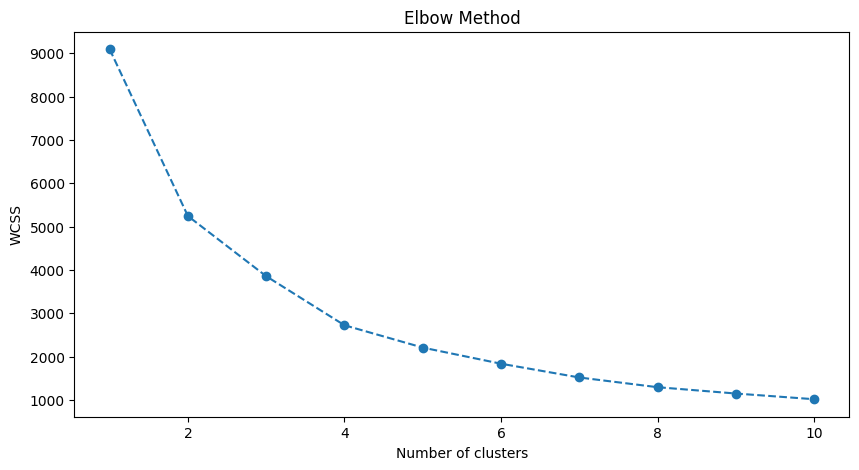

In [19]:
# now we applly the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(reducedData)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
# Number of clusters are chosen to be 4
k = 4

In [21]:
# Perform KMeans clustering on the PCA-reduced data
kmeans = KMeans(n_clusters=k, n_init='auto')
clusters = kmeans.fit_predict(reducedData)

In [22]:
# Add the cluster labels to your original dataframe
dataframe['cluster'] = clusters

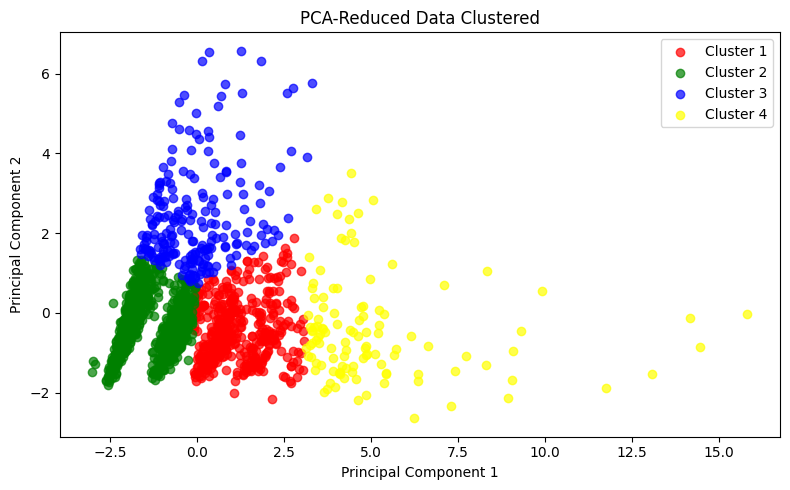

In [23]:
# Visualizing the clusters - let's plot the first two principal components
plt.figure(figsize=(8, 5))
colors = ['red', 'green', 'blue', 'yellow']
for i in range(k):
    plt.scatter(reducedData[dataframe['cluster'] == i, 0], 
                reducedData[dataframe['cluster'] == i, 1], 
                label=f'Cluster {i+1}', 
                alpha=0.7, 
                color=colors[i])
plt.title('PCA-Reduced Data Clustered')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
sampled_img_indices = dataframe.groupby('cluster')['image_indx'].apply(lambda x: x.sample(n=min(len(x), 5))).reset_index(level='cluster')

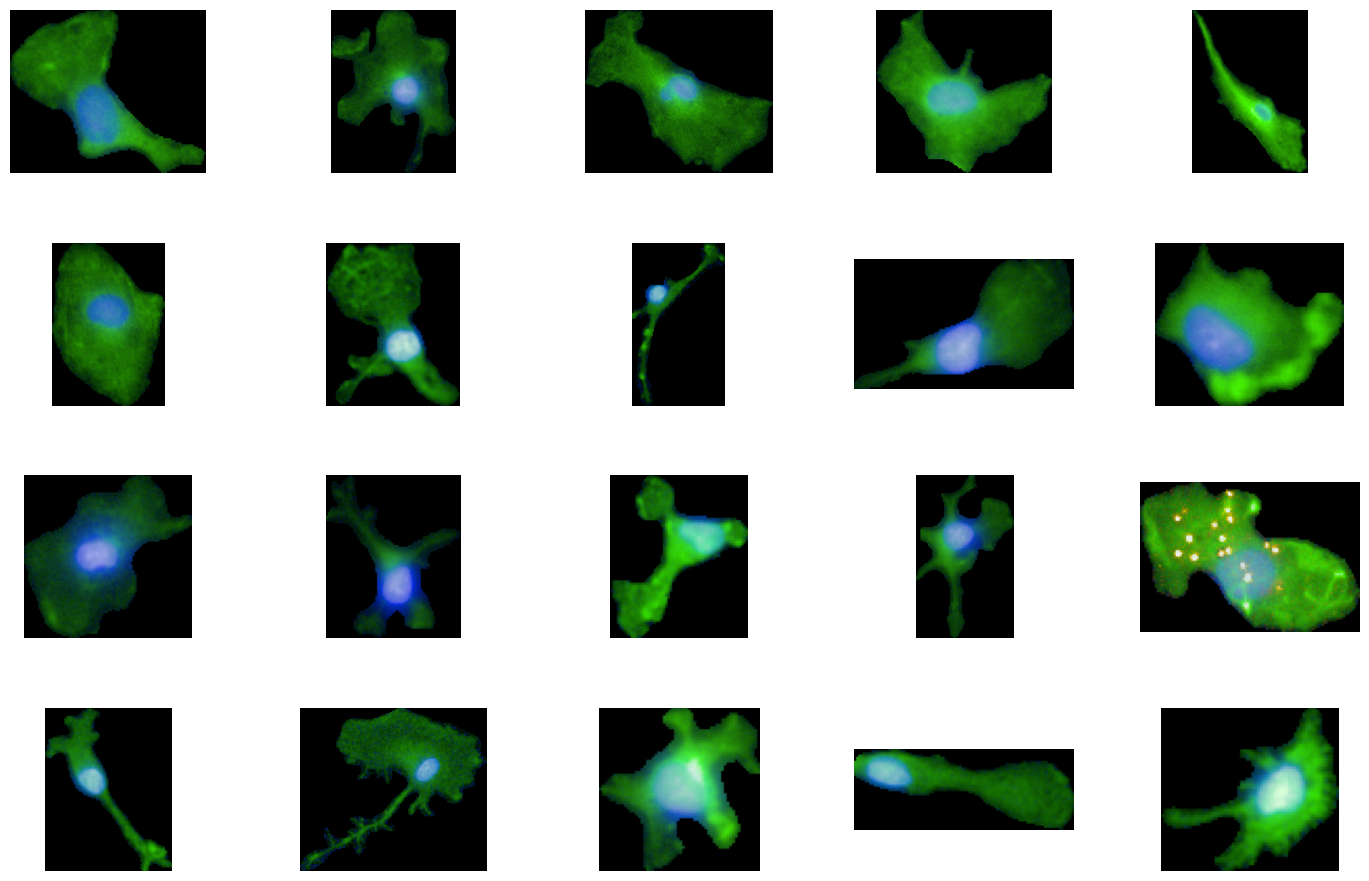

In [32]:
fig, axs = plt.subplots(k, 5, figsize=(15, 10))

# Iterate over each cluster
for cluster_id in range(k):
    # Get the indices of images for this cluster
    image_indices = sampled_img_indices[sampled_img_indices['cluster'] == cluster_id]['image_indx'].tolist()
    
    # Load and plot each image in its subplot
    for i, img_idx in enumerate(image_indices):
        # Read the image
        img = plt.imread(pathFolder + str(img_idx) + '.png')
        axs[cluster_id, i].imshow(img)
        axs[cluster_id, i].axis('off')  # Turn off axis numbers and ticks

    if len(axs.shape) > 1:
        axs[cluster_id, 0].set_ylabel(f'Cluster {cluster_id}', size='large')
    else:
        axs[0].set_ylabel(f'Cluster {cluster_id}', size='large')

# Adjust layout
plt.tight_layout(pad=5.0)
plt.show()